**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_local -p 8888:8888 -d palmoreck/jupyterlab:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_local
```


Documentación de la imagen de docker `palmoreck/jupyterlab:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab).

---

Nota generada a partir de [liga](https://www.dropbox.com/s/5bc6tn39o0qqg35/1.3.Condicion_estabilidad_y_normas.pdf?dl=0)

**La siguiente celda muestra el modo de utilizar el comando magic de `%pip` para instalar paquetes desde jupyterlab.** Ver [liga](https://ipython.readthedocs.io/en/stable/interactive/magics.html#built-in-magic-commands) para magic commands.

In [3]:
%pip install -q --user numpy matplotlib scipy

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


La siguiente celda reiniciará el kernel de **IPython** para cargar los paquetes instalados en la celda anterior. Dar **Ok** en el mensaje que salga y continuar con el contenido del notebook.

In [4]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)  

{'status': 'ok', 'restart': True}

# 1.3 Condición de un problema y estabilidad de un algoritmo

Dos temas fundamentales en el análisis numérico son: la **condición de un problema** y **estabilidad de un algoritmo**. El condicionamiento tiene que ver con el comportamiento de un problema ante perturbaciones y la estabilidad con el comportamiento de un algoritmo (usado para resolver un problema) ante perturbaciones.

La exactitud de un cálculo dependerá finalmente de una combinación de estos términos:

<p style="text-align: center;">Exactitud = Condición + Estabilidad</p>

La falta de exactitud en un problema se presenta entonces por problemas mal condicionados (no importando si los algoritmos son estables o inestables) y algoritmos inestables (no importando si los problemas son mal o bien condicionados).

## Perturbaciones

La condición de un problema y estabilidad de un algoritmo hacen referencia al término **perturbación**. Tal término conduce a pensar en perturbaciones "chicas" o "grandes". Para dar una medida de lo anterior se utiliza el concepto de **norma**. Ver final de esta nota para definición de norma y propiedades.

## Condición de un problema

Pensemos a un problema como una función $f: \mathbb{X} \rightarrow \mathbb{Y}$ donde $\mathbb{X}$ es un espacio vectorial con norma definida y $\mathbb{Y}$ es otro espacio vectorial de soluciones con una norma definida. Llamemos instancia de un problema a la combinación entre $x,f$ y nos interesa el comportamiento de $f$ en $x$. Usamos el nombre de "problema" para referirnos al de instancia del problema.

Un problema (instancia) bien condicionado tiene la propiedad de que todas las perturbaciones pequeñas en $x$ conducen a pequeños cambios en $f(x)$. Y es mal condicionado si perturbaciones pequeñas en $x$ conducen a grandes cambios en $f(x)$. El uso de los términos "pequeño" o "grande" dependen del problema mismo.

Sea $\hat{x} = x + \Delta x$ con $\Delta x$ una perturbación pequeña de $x$.

El **número de condición relativo del problema $f$ en $x$** es:

$$\text{Cond}_f^R = \frac{\text{ErrRel}(f(\hat{x}))}{\text{ErrRel}(\hat{x})}  = \frac{\frac{||f(\hat{x})-f(x)||}{||f(x)||}}{\frac{||x-\hat{x}||}{||x||}}$$

considerando $x,f(x) \neq 0$.

**Obs:** si $f$ es una función diferenciable, podemos evaluar $\text{Cond}_f^R$ con la derivada de $f$, pues a primer orden (usando teorema de Taylor): $f(\hat{x})-f(x) \approx \mathcal{J}_f(x)\Delta x$ con igualdad para $\Delta x \rightarrow 0$ y $\mathcal{J}_f$ la Jacobiana de $f$ definida como una matriz con entradas: $(\mathcal{J}_f(x))_{ij} = \frac{\partial f_i(x)}{\partial x_j}$. Por tanto, se tiene:

$$\text{Cond}_{f}^R = \frac{||\mathcal{J}_f(x)||||x||}{||f(x)||}$$

y $||\mathcal{J}_f(x)||$ es una norma matricial inducida por las normas en $\mathbb{X}, \mathbb{Y}$. Ver final de esta nota para definición de norma y propiedades.

**Comentario:** en la práctica se considera a un problema **bien condicionado** si $\text{Cond}_f^R$ es "pequeño": menor a $10$, **medianamente condicionado** si es de orden entre $10^1$ y $10^2$ y **mal condicionado** si es "grande": mayor a $10^3$.

**Ejercicio:**

Calcular $\text{Cond}_f^R$ de los siguientes problemas. Para $x \in \mathbb{R}$ usa el valor absoluto y para $x \in \mathbb{R}^n$ usa $||x||_\infty$.

1. $x \in \mathbb{R} - \{0\}$. Problema: realizar la operación $\frac{x}{2}$.

2. $x \geq 0$. Problema: calcular $\sqrt{x}$.

3. $x \approx \frac{\pi}{2}$. Problema: calcular $\cos(x)$.

4. $x \in \mathbb{R}^2$. Problema: calcular $x_1-x_2$.

**Comentario:** las dificultades que pueden surgir al resolver un problema **no** siempre están relacionadas con una fórmula o un algoritmo mal diseñado sino con el problema en cuestión. En el ejercicio anterior, observamos que áun utilizando **aritmética exacta**, la solución del problema puede ser altamente sensible a perturbaciones a los datos de entrada. Por esto el número de condición relativo se define de acuerdo a perturbaciones en los datos de entrada y mide la perturbación en los datos de salida que uno espera: 

$$\text{Cond}_f^R = \frac{||\text{Cambios relativos en la solución}||}{||\text{Cambios relativos en los datos de entrada}||}.$$

## Estabilidad de un algoritmo

Pensemos a un algoritmo $\hat{f}$ como una función $\hat{f}:\mathbb{X}\rightarrow \mathbb{Y}$ para resolver el problema $f$ con datos $x \in \mathbb{X}$, donde $\mathbb{X}$ es un espacio vectorial con norma definida y $\mathbb{Y}$ es otro espacio vectorial con una norma definida.


La implantación del algoritmo $\hat{f}$ en una máquina conduce a considerar:

* Errores por redondeo:

$$fl(u) = u(1+\epsilon), |\epsilon| \leq \epsilon_{maq}, \forall u \in \mathbb{R}.$$

* Operaciones en un SPFN, $\mathcal{Fl}$. Por ejemplo para la suma:

$$u \oplus v  = fl(u+v) = (u + v)(1+\epsilon), |\epsilon|\leq \epsilon_{maq} \forall u,v \in \mathcal{Fl}.$$

Esto es, $\hat{f}$ depende de $x \in \mathbb{X}$ y $\epsilon_{maq}$: representación de los números reales en una máquina y operaciones entre ellos o aritmética de máquina. Ver nota: [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb).

Al ejecutar $\hat{f}$ obtenemos una colección de números en el SPFN que pertenecen a $\mathbb{Y}$: $\hat{f}(x)$.

Debido a las diferencias entre un problema con cantidades continuas y una máquina que trabaja con cantidades discretas, los algoritmos numéricos **no** son exactos para **cualquier** elección de datos $x \in \mathbb{X}$. Esto es, los algoritmos **no** cumplen que la cantidad: 

$$\frac{||\hat{f}(x)-f(x)||}{||f(x)||}$$

dependa únicamente de errores por redondeo al evaluar $f$ $\forall x \in \mathbb{X}$. En notación matemática:

$$\frac{||\hat{f}(x)-f(x)||}{||f(x)||} \leq K \epsilon_{maq} \forall x \in \mathbb{X}$$

con $K > 0$ no se cumple en general.

La razón de lo anterior tiene que ver con cuestiones en la implantación de $\hat{f}$ como el número de iteraciones, la representación de $x$ en un SPFN o el mal condicionamiento de $f$. Así, a los algoritmos en el análisis numérico, se les pide una condición menos estricta que la anterior y más bien satisfagan lo que se conoce como **estabilidad**. Se dice que un algoritmo $\hat{f}$ para un problema $f$ es **estable** si:

$$\forall x \in \mathbb{X}, \frac{||\hat{f}(x)-f(\hat{x})||}{||f(\hat{x})||} \leq K_1\epsilon_{maq}, K_1>0$$

para $\hat{x} \in \mathbb{X}$ tal que $\frac{||x-\hat{x}||}{||x||} \leq K_2\epsilon_{maq}, K_2>0$.

Esto es, $\hat{f}$ resuelve un problema cercano para datos cercanos (cercano en el sentido del $\epsilon_{maq}$) independientemente de la elección de $x$.

**Obs:** obsérvese que esta condición es más flexible y en general $K_1, K_2$ dependen de las dimensiones de $\mathbb{X},\mathbb{Y}$.

**Comentarios:**

* Esta definición resulta apropiada para la mayoría de los problemas en el ánalisis numérico. Para otras áreas, por ejemplo en ecuaciones diferenciales, donde se tienen definiciones de sistemas dinámicos estables e inestables (cuyas definiciones no se deben confundir con las descritas para algoritmos), esta condición es muy estricta.

* Tenemos algoritmos que satisfacen una condición más estricta y simple que la estabilidad: **estabilidad hacia atrás**:



### Estabilidad hacia atrás

Decimos que un algoritmo $\hat{f}$ para el problema $f$ es **estable hacia atrás** si:

$$\forall x \in \mathbb{X}, \hat{f}(x) = f(\hat{x})$$

con $\hat{x} \in \mathbb{X}$ tal que $\frac{||x-\hat{x}||}{||x||} \leq K\epsilon_{maq}, K>0$.

Esto es, el algoritmo $\hat{f}$ da la solución **exacta** para datos cercanos (cercano en el sentido de $\epsilon_{maq}$), independientemente de la elección de $x$.

**Comentario:** Para entender la estabilidad hacia atrás de un algoritmo, considérese el ejemplo siguiente. 

**Problema:** evaluar $f(x) = e^x$ en $x=1$.

**Resultado:** $f(1) = e^1 = 2.718281...$.



In [1]:
import math
x=1
math.exp(x)

2.718281828459045

**Algoritmo:** truncar la serie $1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \dots $ a cuatro términos: $\hat{f}(x) = 1 + x + \frac{x^2}{2} + \frac{x^3}{6}$.

**Resultado del algoritmo:** $\hat{f}(1) = 2.\bar{6}$

In [2]:
algoritmo = lambda x: 1 + x + x**2/2.0 + x**3/6.0

In [3]:
algoritmo(1)

2.6666666666666665

**Pregunta:** ¿Qué valor $\hat{x} \in \mathbb{R}$ hace que el valor calculado por el algoritmo $\hat{f}(1)$ sea igual a $f(\hat{x})$?

-> **Solución:** 

Resolver la ecuación: $e^{\hat{x}} = 2.\bar{6}$, esto es: $\hat{x} = log(2.\bar{6}) = 0.980829...$. Entonces $f(\hat{x}) = 2.\bar{6} = \hat{f}(x)$.

In [4]:
x_hat = math.log(algoritmo(1))
x_hat

0.9808292530117262

Entonces, el algoritmo es estable hacia atrás sólo si la diferencia entre $x$ y $\hat{x}$ en términos relativos es menor a $K \epsilon_{maq}$ con $K >0$. Además, podemos calcular **errores hacia delante** y **errores hacia atrás**:

error hacia delante: $\hat{f}(x) - f(x) = -0.05161...$, error hacia atrás: $\hat{x}-x = -0.01917...$.

In [5]:
err_delante = algoritmo(x) - math.exp(x)
err_delante

-0.05161516179237857

In [6]:
err_atras = x_hat-x
err_atras

-0.019170746988273812

Dependiendo del problema estos errores son pequeños o grandes, por ejemplo si consideramos tener una cifra correcta como suficiente para determinar que es una buena aproximación entonces podemos concluir: $\hat{f}$ obtiene una respuesta correcta y cercana al valor de $f$ (error hacia delante) y la respuesta que obtuvimos con $\hat{f}$ es correcta para datos ligeramente perturbados (error hacia atrás).

**Obs:** 

* Obsérvese que el error hacia delante requiere resolver el problema $f$ (para calcular $f(x)$) y de información sobre $f$.

* En el ejemplo anterior se calculó $\hat{f}(x)$ y se calculó qué tan larga debe ser la modificación en los datos $x$, esto es: $\hat{x}$, para que $\hat{f}(x) = f(\hat{x})$ (error hacia atrás).


* Dibujo que ayuda a ver errores hacia atrás y hacia delante:

<img src="https://dl.dropboxusercontent.com/s/b30awajxvl3u8qe/error_hacia_delante_hacia_atras.png?dl=0" heigth="500" width="500">

En resumen, algunas características de un método **estable** numéricamente respecto al redondeo son:

* Variaciones "pequeñas" en los datos de entrada del método generan variaciones "pequeñas" en la solución del problema. 

* No amplifican errores de redondeo en los cálculos involucrados.

* Resuelven problemas "cercanos" para datos ligeramente modificados.

# 1.3.1 Número de condición de una matriz

En el curso trabajaremos con algoritmos matriciales que son numéricamente estables (o estables hacia atrás) ante errores por redondeo, sin embargo la exactitud que obtengamos con tales algoritmos dependerán de qué tan bien (o mal) condicionado esté el problema. En el caso de matrices la condición de un problema puede ser cuantificada con el **número de condición** de la matriz del problema. Aunque haciendo uso de definiciones como la pseudoinversa de una matriz es posible definir el número de condición para una matriz en general rectangular $A \in \mathbb{R}^{m\times n}$, en esta primera definición consideramos matrices cuadradas no singulares $A \in \mathbb{R}^{n\times n}$:

$$\text{cond}(A) = ||A|| ||A^{-1}||.$$

**Obs:** obsérvese que la norma anterior es una **norma matricial** y cond$(\cdot)$ puede calcularse para diferentes normas matriciales. Ver final de esta nota para definición de norma y propiedades.

## ¿Por qué se utiliza la expresión $||A|| ||A^{-1}||$ para definir el número de condición de una matriz?

Esta pregunta tiene que ver con el hecho que tal expresión aparece frecuentemente en problemas típicos de matrices. Para lo anterior considérese los siguientes problemas $f$:

1.Sean $A \in \mathbb{R}^{n\times n}$ no singular, $x \in \mathbb{R}^n$ y $f$ el problema de realizar la multiplicación $Ax$ para $x$ fijo, esto es: $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ dada por $f(x) = Ax$. Considérese una perturbación en $x: \hat{x} = x + \Delta x$, entonces:

$$\text{Cond}_f^R = \frac{\text{ErrRel}(f(\hat{x}))}{\text{ErrRel}(\hat{x})} = \frac{\frac{||f(\hat{x})-f(x)||}{||f(x)||}}{\frac{||x-\hat{x}||}{||x||}} \approx \frac{||\mathcal{J}_f(x)||||x||}{||f(x)||}.$$

Para este problema tenemos: 

$$\frac{||\mathcal{J}_f(x)||||x||}{||f(x)||} = \frac{||A|| ||x||}{||Ax||}.$$

Si las normas matriciales utilizadas en el número de condición son consistentes (ver final de esta nota para definición de norma y propiedades) entonces: 

$$||x|| = ||A^{-1}Ax|| \leq ||A^{-1}||||Ax|| \therefore \frac{||x||}{||Ax||} \leq ||A^{-1}||$$

y se tiene:

$$\text{Cond}_f^R \leq ||A|| ||A^{-1}||.$$

2.Sean $f: \mathbb{R}^n \rightarrow \mathbb{R}, A \in \mathbb{R}^{n\times n}$ no singular. Considérese el problema de calcular $f(b) = A^{-1}b$ para $b \in \mathbb{R}^n$ fijo y la perturbación $\hat{b} = b + \Delta b$ entonces bajo las suposiciones del ejemplo anterior:

$$\text{Cond}_f^R \approx \frac{||A^{-1}|| ||b||}{||A^{-1}b||}.$$

Si las normas matriciales utilizadas en el número de condición son consistentes (ver final de esta nota para definición de norma y propiedades) entonces: 

$$||b|| = ||AA^{-1}b|| \leq ||A|| ||A^{-1}b|| \therefore \text{Cond}_f^R \leq ||A^{-1}|| ||A||.$$

3.Sean $f: \mathbb{R}^{n\times n} \rightarrow \mathbb{R}^n, A \in \mathbb{R}^{n\times n}$ no singular $b \in \mathbb{R}^n$ fijo. Considérese el problema de calcular la solución $x$ del sistema $Az=b$, esto es, calcular: $x = f(A) = A^{-1}b.$ Además, considérese la perturbación $\hat{A} = A + \Delta A$ en tal sistema $Az = b$. Se tiene:


$$\hat{x} = \hat{A}^{-1}b,$$

donde: $\hat{x} = x + \Delta x$ (si se perturba $A$ entonces se perturba también $x$).


De la ecuación anterior como $\hat{x} = \hat{A}^{-1}b$ se tiene:

$$\hat{A}\hat{x} = b$$

$$(A+\Delta A)(x+\Delta x) = b$$

$$Ax + A \Delta x + \Delta Ax + \Delta A \Delta x = b$$

$$b + A \Delta x + \Delta A x = b$$

Donde en esta última ecuación se supuso que $\Delta A \Delta x \approx 0$ y de aquí:

$$A \Delta x + \Delta A x  \approx 0 \therefore \Delta x \approx - A^{-1} \Delta A x.$$

Entonces se tiene que la condición del problema $f$ calcular la solución de sistema de ecuaciones lineales $Az=b$ con $A$ no singular ante perturbaciones en $A$ es:

$$\text{Cond}_f^R = \frac{\frac{||x-\hat{x}||}{||x||}}{\frac{||A-\hat{A}||}{||A||}}=\frac{\frac{||\Delta x||}{||x||}}{\frac{||\Delta A||}{||A||}} \leq \frac{\frac{||A^{-1}||||\Delta Ax||}{||x||}}{\frac{||\Delta A||}{||A||}} \leq ||A^{-1}||||A||.$$

## ¿Qué está midiendo el número de condición de una matriz respecto a un sistema de ecuaciones lineales?

El número de condición de una matriz mide la **sensibilidad** de la solución de un sistema de ecuaciones lineales ante perturbaciones en los datos de entrada (en la matriz del sistema $A$ o en el lado derecho $b$). Si pequeños cambios en los datos de entrada generan grandes cambios en la solución tenemos un **sistema mal condicionado**. Si pequeños cambios en los datos de entrada generan pequeños cambios en la solución tenemos un sistema **bien condicionado**. Lo anterior puede apreciarse con los siguientes ejemplos y gráficas:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pprint

1.Resolver los siguientes sistemas:

$$a) \begin{array}{ccc} x_1 +2x_2   &= & 10 \\ 1.1x_1 + 2x_2 &= & 10.4 \end{array} $$

$$b)\begin{array}{ccc} 1.05x_1 +2x_2  &= & 10 \\ 1.1x_1 + 2x_2 &= & 10.4\end{array} $$

In [8]:
print('inciso a')
A = np.array([[1, 2], [1.1, 2]])
b = np.array([10,10.4])
print('matriz A:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso a
matriz A:
array([[1. , 2. ],
       [1.1, 2. ]])
lado derecho b:
array([10. , 10.4])


In [9]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([4., 3.])


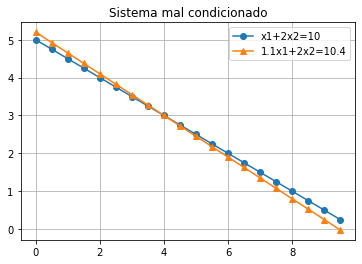

In [10]:
x=np.arange(0,10,.5)
recta1 = lambda x: 1/2.0*(10-1*x)
recta2 = lambda x: 1/2.0*(10.4-1.1*x)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema mal condicionado')
plt.legend(('x1+2x2=10','1.1x1+2x2=10.4'))
plt.grid(True)
plt.show()

**Obs:** obsérvese que las dos rectas anteriores tienen una inclinación (pendiente) similar por lo que no se ve claramente el punto en el que intersectan.

In [11]:
print('inciso b')
A = np.array([[1.05, 2], [1.1, 2]])
b = np.array([10,10.4])
print('matriz A ligeramente modificada:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso b
matriz A ligeramente modificada:
array([[1.05, 2.  ],
       [1.1 , 2.  ]])
lado derecho b:
array([10. , 10.4])


In [12]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([8. , 0.8])


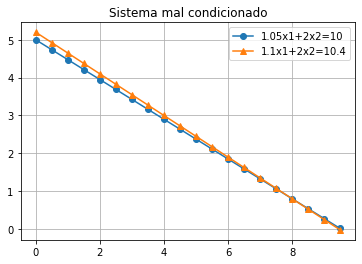

In [13]:
x=np.arange(0,10,.5)
recta1 = lambda x: 1/2.0*(10-1.05*x)
recta2 = lambda x: 1/2.0*(10.4-1.1*x)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema mal condicionado')
plt.legend(('1.05x1+2x2=10','1.1x1+2x2=10.4'))
plt.grid(True)
plt.show()

**Obs:** al modificar un poco las entradas de la matriz $A$ la solución del sistema cambia drásticamente.

**Comentario:** otra forma de describir a un sistema mal condicionado es que un amplio rango de valores en un SPFN satisfacen tal sistema de forma aproximada.

2.Resolver los siguientes sistemas:
    
$$a) \begin{array}{ccc} .03x_1 + 58.9x_2   &= & 59.2 \\ 5.31x_1 -6.1x_2 &= & 47 \end{array} $$

$$a) \begin{array}{ccc} .03x_1 + 58.9x_2   &= & 59.2 \\ 5.31x_1 -6.05x_2 &= & 47 \end{array} $$

In [14]:
print('inciso a')
A = np.array([[.03, 58.9], [5.31, -6.1]])
b = np.array([59.2,47])
print('matriz A:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso a
matriz A:
array([[ 3.00e-02,  5.89e+01],
       [ 5.31e+00, -6.10e+00]])
lado derecho b:
array([59.2, 47. ])


In [15]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([10.,  1.])


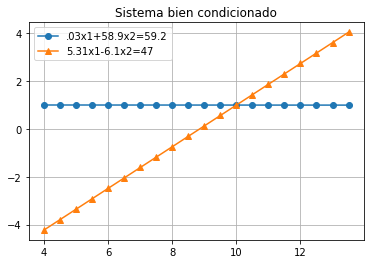

In [16]:
x=np.arange(4,14,.5)
recta1 = lambda x: 1/58.9*(59.2-.03*x)
recta2 = lambda x: 1/6.1*(5.31*x-47)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema bien condicionado')
plt.legend(('.03x1+58.9x2=59.2','5.31x1-6.1x2=47'))
plt.grid(True)
plt.show()

**Obs:** obsérvese que la solución del sistema de ecuaciones (intersección entre las dos rectas) está claramente definido.

In [17]:
print('inciso b')
A = np.array([[.03, 58.9], [5.31, -6.05]])
b = np.array([59.2,47])
print('matriz A ligeramente modificada:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso b
matriz A ligeramente modificada:
array([[ 3.00e-02,  5.89e+01],
       [ 5.31e+00, -6.05e+00]])
lado derecho b:
array([59.2, 47. ])


In [18]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([9.99058927, 1.00000479])


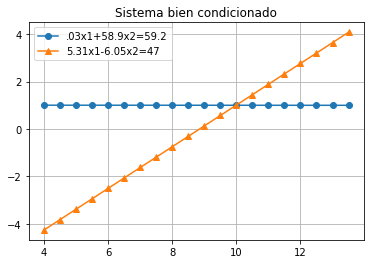

In [19]:
x=np.arange(4,14,.5)
recta1 = lambda x: 1/58.9*(59.2-.03*x)
recta2 = lambda x: 1/6.05*(5.31*x-47)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema bien condicionado')
plt.legend(('.03x1+58.9x2=59.2','5.31x1-6.05x2=47'))
plt.grid(True)
plt.show()

**Obs:** al modificar un poco las entradas de la matriz $A$ la solución **no** cambia mucho.

**Comentarios:** 

1.¿Por qué nos interesa considerar perturbaciones en los datos de entrada? -> recuérdese que los números reales se representan en la máquina mediante el sistema de punto flotante (SPF), entonces al ingresar datos a la máquina tenemos perturbaciones y por tanto errores de redondeo. Ver nota: [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)

2.Las matrices anteriores tienen número de condición distinto:

In [20]:
print('matriz del ejemplo 1')
A = np.array([[1, 2], [1.1, 2]])
pprint.pprint(A)

matriz del ejemplo 1
array([[1. , 2. ],
       [1.1, 2. ]])


su número de condición es:

In [21]:
np.linalg.cond(A)

51.03040383918669

In [22]:
print('matriz del ejemplo 2')
A = np.array([[.03, 58.9], [5.31, -6.1]])
pprint.pprint(A)

matriz del ejemplo 2
array([[ 3.00e-02,  5.89e+01],
       [ 5.31e+00, -6.10e+00]])


su número de condición es:

In [23]:
np.linalg.cond(A)

11.205557604869346

Las matrices del ejemplo $1$ y $2$ son **medianamente** condicionadas. Una matriz se dice **bien condicionada** si cond$(A)$ es cercano a $1$.

## Algunas propiedades del número de condición de una matriz

* Si $A \in \mathbb{R}^{n\times n}$ es no singular entonces:

$$\frac{1}{\text{cond}(A)} = \min \left\{ \frac{||A-B||}{||A||} \mathrel{}\middle|\mathrel{} B \text{ es singular}, ||\cdot|| \text{ es una norma inducida} \right\}.$$

esto es, una matriz mal condicionada (número de condición grande) se le puede aproximar muy bien por una matriz singular. Sin embargo, el mal condicionamiento no necesariamente se relaciona con singularidad. Una matriz singular es mal condicionada pero una matriz mal condicionada no necesariamente es singular. Considérese por ejemplo la matriz de **Hilbert**:

In [24]:
from scipy.linalg import hilbert

In [25]:
hilbert(4)

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [26]:
np.linalg.cond(hilbert(4))

15513.738738929038

la cual es una matriz mal condicionada pero es no singular:

In [27]:
np.linalg.inv(hilbert(4))@hilbert(4)

array([[ 1.00000000e+00, -2.84217094e-14, -2.13162821e-14,
        -1.42108547e-14],
       [ 0.00000000e+00,  1.00000000e+00,  1.13686838e-13,
         5.68434189e-14],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.13686838e-13,
         1.00000000e+00]])

y otro ejemplo de una matriz singular:

In [28]:
print('matriz singular')
A = np.array([[1, 2], [1, 2]])
pprint.pprint(A)

matriz singular
array([[1, 2],
       [1, 2]])


In [29]:
np.linalg.inv(A)

LinAlgError: Singular matrix

In [30]:
np.linalg.cond(A)

7.452221309548728e+16

* Para las normas matriciales inducidas se tiene:

    * cond$(A)\geq 1, \forall A \in \mathbb{R}^{n\times n}$.
    
    * cond$(\gamma A) = \text{cond}(A), \forall \gamma \in \mathbb{R}-\{0\}, \forall A \in \mathbb{R}^{n\times n}$.
    
    * cond$_2(A) = ||A||_2||A^{-1}||_2 = \frac{\sigma_{\max}}{\sigma_{\min}}, \sigma_{\min} \neq 0$.

* En el problema: resolver $Ax = b$ se cumple:

$$\text{ErrRel}(\hat{x}) = \frac{||x^*-\hat{x}||}{||x^*||} \leq \text{cond}(A) \left ( \frac{||\Delta A||}{||A||} + \frac{||\Delta b||}{||b||} \right ), b \neq 0.$$

donde: $x^*$ es solución de $Ax=b$ y $\hat{x}$ es solución aproximada que se obtiene por algún método numérico (por ejemplo factorización LU). $\frac{||\Delta A||}{||A||}, \frac{||\Delta b||}{||b||}$ son los errores relativos en las entradas de $A$ y $b$ respectivamente.

**Comentario:** la desigualdad anterior se puede interpretar como sigue: si sólo tenemos perturbaciones en $A$ de modo que se tienen errores por redondeo del orden de $10^{-k}$ y por lo tanto $k$ dígitos de precisión en $A$ y cond$(A)$ es del orden de $10^c$ entonces $\text{ErrRel}(\hat{x})$ puede llegar a tener errores de redondeo de a lo más del orden de $10^{c-k}$ y por tanto $k-c$ dígitos de precisión:

$$\text{ErrRel}(\hat{x}) \leq \text{cond}(A) \frac{||\Delta A||}{||A||}.$$

* Supongamos que $x^*$ es solución del sistema $Ax=b$ y obtenemos $\hat{x}$ por algún método numérico (por ejemplo factorización LU) entonces ¿qué condiciones garantizan que $||x^*-\hat{x}||$ sea cercano a cero (del orden de $ \epsilon_{maq}= 10^{-16}$), ¿de qué depende esto?

Para responder las preguntas anteriores definimos el residual de $Ax=b$ como $$r=A\hat{x}-b$$ con $\hat{x}$ aproximación a $x^*$ obtenida por algún método numérico. Asimismo, el residual relativo a la norma de $b$ como:

$$\frac{||r||}{||b||}.$$

**Obs:** típicamente $x^*$ (solución exacta) es desconocida y por ello no podríamos calcular $||x^*-\hat{x}||$, sin embargo sí podemos calcular el residual relativo a la norma de $b$: $\frac{||r||}{||b||}$. ¿Se cumple que $\frac{||r||}{||b||}$ pequeño implica $\text{ErrRel}(\hat{x})$ pequeño? El siguiente resultado nos ayuda a responder esta y las preguntas anteriores:

Sea $A \in \mathbb{R}^{n\times n}$ no singular, $x^*$ solución de $Ax=b$, $\hat{x}$ aproximación a $x^*$, entonces para las normas matriciales inducidas se cumple:

$$\frac{||r||}{||b||} \frac{1}{\text{cond}(A)} \leq \frac{||x^*-\hat{x}||}{||x^*||}\leq \text{cond}(A)\frac{||r||}{||b||}.$$

Por la desigualdad anterior, si $\text{cond}(A) \approx 1$ entonces $\frac{||r||}{||b||}$ es una buena estimación de $\text{ErrRel}(\hat{x}) = \frac{||x^*-\hat{x}||}{||x^*||}$ por lo que $\hat{x}$ es una buena estimación de $x^*$. Si $\text{cond}(A)$ es grande no podemos decir **nada** acerca de $\text{ErrRel}(\hat{x})$ ni de $\hat{x}$.

**Ejemplos:**

1.

$$a) \begin{array}{ccc} x_1 + x_2   &= & 2 \\ 10.05x_1 + 10x_2 &= & 21 \end{array} $$

$$b) \begin{array}{ccc} x_1 + x_2   &= & 2 \\ 10.1x_1 + 10x_2 &= & 21 \end{array} $$

In [31]:
print('inciso a')
A_1 = np.array([[1, 1], [10.05, 10]])
b_1 = np.array([2,21])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 1.  ,  1.  ],
       [10.05, 10.  ]])
lado derecho b_1:
array([ 2, 21])


In [32]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([ 20., -18.])


In [33]:
print('inciso b')
A_2 = np.array([[1, 1], [10.1, 10]])
b_2 = np.array([2,21])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 1. ,  1. ],
       [10.1, 10. ]])
lado derecho b_2:
array([ 2, 21])


In [34]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([10., -8.])


In [35]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
r_rel

residual relativo:


0.02370227315699886

In [36]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
0.5255883312276253


**no tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [37]:
np.linalg.cond(A_1)

4060.04975369993

De acuerdo a la cota del resultado el error relativo se encuentra en el intervalo:

In [38]:
(r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1))

(5.837926773039897e-06, 96.23240829320169)

2. 

$$a) \begin{array}{ccc} 4.1x_1 + 2.8x_2   &= & 4.1 \\ 9.7x_1 + 6.6x_2 &= & 9.7 \end{array}$$

$$b) \begin{array}{ccc} 4.1x_1 + 2.8x_2   &= & 4.11 \\ 9.7x_1 + 6.6x_2 &= & 9.7 \end{array}$$

In [39]:
print('inciso a')
A_1 = np.array([[4.1, 2.8], [9.7, 6.6]])
b_1 = np.array([4.1,9.7])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[4.1, 2.8],
       [9.7, 6.6]])
lado derecho b_1:
array([4.1, 9.7])


In [40]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([ 1.00000000e+00, -2.63677968e-15])


In [41]:
print('inciso b')
A_2 = np.array([[4.1, 2.8], [9.7, 6.6]])
b_2 = np.array([4.11,9.7])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[4.1, 2.8],
       [9.7, 6.6]])
lado derecho b_2:
array([4.11, 9.7 ])


In [42]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([0.34, 0.97])


In [43]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
r_rel

residual relativo:


0.0009495858335005704

In [44]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
1.173243367763135


**no tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [45]:
np.linalg.cond(A_1)

1622.9993838564628

In [46]:
(r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1))

(5.850808342540636e-07, 1.5411772226902514)

3. 

$$a) \begin{array}{ccc} 3.9x_1 + 11.6x_2   &= & 5.5 \\ 12.8x_1 + 2.9x_2 &= & 9.7 \end{array}$$

$$b) \begin{array}{ccc} 3.95x_1 + 11.6x_2   &= & 5.5 \\ 12.8x_1 + 2.9x_2 &= & 9.7 \end{array}$$

In [47]:
print('inciso a')
A_1 = np.array([[3.9, 11.6], [12.8, 2.9]])
b_1 = np.array([5.5,9.7])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 3.9, 11.6],
       [12.8,  2.9]])
lado derecho b_1:
array([5.5, 9.7])


In [48]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([0.70401691, 0.23744259])


In [49]:
print('inciso b')
A_2 = np.array([[3.95, 11.6], [12.8, 2.9]])
b_2 =  np.array([5.5,9.7])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 3.95, 11.6 ],
       [12.8 ,  2.9 ]])
lado derecho b_2:
array([5.5, 9.7])


In [50]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([0.7047619 , 0.23415435])


In [51]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
r_rel

residual relativo:


0.0031601448781200417

In [52]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
0.004537910940159858


**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [53]:
np.linalg.cond(A_1)

1.7884565161384884

In [54]:
(r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1))

(0.0017669676895154308, 0.005651781699215458)

3. 

$\theta=\frac{\pi}{3}$

In [55]:
theta_1=math.pi/3

In [56]:
(math.cos(theta_1),math.sin(theta_1))

(0.5000000000000001, 0.8660254037844386)

In [57]:
theta_2 = math.pi/3 + .00005

In [58]:
theta_2

1.0472475511965977

In [59]:
(math.cos(theta_2),math.sin(theta_2))

(0.49995669810482884, 0.8660504027018965)

$$a) \begin{array}{ccc} \cos(\theta_1)x_1 - \sin(\theta_1)x_2   &= & -1.5 \\ \sin(\theta_1)x_1 + \cos(\theta_1)x_2 &= & 2.4 \end{array}$$

$$b) \begin{array}{ccc} \cos(\theta_2)x_1 - \sin(\theta_2)x_2   &= & -1.5 \\ \sin(\theta_2)x_1 + \cos(\theta_2)x_2 &= & 2.4 \end{array}$$

$$c) \begin{array}{ccc} \cos(\theta_2)x_1 - \sin(\theta_2)x_2   &= & -1.7 \\ \sin(\theta_2)x_1 + \cos(\theta_2)x_2 &= & 2.4 \end{array}$$

In [60]:
print('inciso a')
A_1 = np.array([[math.cos(theta_1), -math.sin(theta_1)], [math.sin(theta_1), math.cos(theta_1)]])
b_1 = np.array([-1.5,2.4])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])
lado derecho b_1:
array([-1.5,  2.4])


In [61]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([1.32846097, 2.49903811])


In [62]:
print('inciso b')
A_2 = np.array([[math.cos(theta_2), -math.sin(theta_2)], [math.sin(theta_2), math.cos(theta_2)]])
b_2 = np.array([-1.5,2.4])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 0.4999567, -0.8660504],
       [ 0.8660504,  0.4999567]])
lado derecho b_2:
array([-1.5,  2.4])


In [63]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([1.32858592, 2.49897168])


In [64]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
'{:0.10e}'.format(r_rel)

residual relativo:


'4.9999999995e-05'

In [65]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
'{:0.10e}'.format(err_rel)

error relativo:


'4.9999999995e-05'

**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [66]:
np.linalg.cond(A_1)

1.0

In [67]:
('{:0.10e}'.format(r_rel*1/np.linalg.cond(A_1)), '{:0.10e}'.format(r_rel*np.linalg.cond(A_1)))

('4.9999999995e-05', '4.9999999995e-05')

In [68]:
print('inciso c')
A_2 = np.array([[math.cos(theta_2), -math.sin(theta_2)], [math.sin(theta_2), math.cos(theta_2)]])
b_2 = np.array([-1.7,2.4])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso c
matriz A_2:
array([[ 0.4999567, -0.8660504],
       [ 0.8660504,  0.4999567]])
lado derecho b_2:
array([-1.7,  2.4])


In [69]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([1.22859458, 2.67218176])


In [70]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
'{:0.14e}'.format(r_rel)

residual relativo:


'7.06241310531937e-02'

In [71]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
'{:0.14e}'.format(err_rel)

error relativo:


'7.06241310531936e-02'

**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [72]:
np.linalg.cond(A_1)

1.0

In [73]:
('{:0.14e}'.format(r_rel*1/np.linalg.cond(A_1)), '{:0.14e}'.format(r_rel*np.linalg.cond(A_1)))

('7.06241310531937e-02', '7.06241310531937e-02')

Así, $\text{cond}(A)$ nos da una calidad (mediante $\frac{||r||}{||b||}$) de la solución $\hat{x}$ en el problema inicial (resolver $Ax=b$) obtenida por algún método numérico respecto a la solución $x^*$ de $Ax=b$.

**Obs:** Por último obsérvese que la condición del problema inicial (resolver $Ax=b$) **no depende del método númerico** que se elige para resolverlo.

**Ejercicio:** proponer sistemas de ecuaciones lineales con distinto número de condición, perturbar matriz del sistema o lado derecho (o ambos) y revisar números de condición y residuales relativos de acuerdo a la cota:

$$\frac{||r||}{||b||} \frac{1}{\text{cond}(A)} \leq \frac{||x^*-\hat{x}||}{||x^*||}\leq \text{cond}(A)\frac{||r||}{||b||}.$$

Verificar que si el número de condición del sistema es pequeño entonces el residual relativo estima bien al error relativo.

**Solución 1**

$$a) \begin{array}{ccc} 2x_1 + x_2   &= & 5 \\ 3x_1 + 4x_2 &= & 17 \end{array}$$

$$b) \begin{array}{ccc} 2.03x_1 + x_2   &= & 5 \\ 3x_1 + 4.01x_2 &= & 17 \end{array}$$

In [74]:
# se crea el sistema de ecuaciones

print('Inciso a')
A_1 = np.array([[2,  1], [3,4]])
b_1 = np.array([5,17])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

Inciso a
matriz A_1:
array([[2, 1],
       [3, 4]])
lado derecho b_1:
array([ 5, 17])


In [75]:
# se resuelve el sistema

x_est = np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([0.6, 3.8])


In [76]:
# se crea el sistema de ecuaciones con perturbaciones del lado izquierdo

print('Inciso b. Sistema con perturbaciones del lado izquierdo')
A_2 = np.array([[2.03,  1], [3,4.01]])
b_2 = np.array([5,17])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

Inciso b. Sistema con perturbaciones del lado izquierdo
matriz A_2:
array([[2.03, 1.  ],
       [3.  , 4.01]])
lado derecho b_2:
array([ 5, 17])


In [77]:
# se resuelve el sistema con perturbaciones del lado izquierdo

x_hat = np.linalg.solve(A_2,b_2)
print('solución x_est:')
pprint.pprint(x_hat)

solución x_est:
array([0.59335058, 3.79549832])


In [78]:
# se calcula el residual relativo

print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print(r_rel)

residual relativo:
0.0023657852887134113


In [79]:
# se calcula el error relativo

print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
print(err_rel)

error relativo:
0.002087282905782044


In [80]:
# se revisan las cotas del error relativo

cota_inf = r_rel*1/np.linalg.cond(A_1)
cota_sup = r_rel*np.linalg.cond(A_1)

print("cotas del error relativo: ","(",cota_inf,",",cota_sup,")")

#('{:0.10e}'.format(r_rel*1/np.linalg.cond(A_1)), '{:0.10e}'.format(r_rel*np.linalg.cond(A_1)))

cotas del error relativo:  ( 0.0004059045842177248 , 0.013788807148062741 )


Con base en lo anterior se puede decir que sí se tiene una buena estimación del error relativo a partir del residual relativo; y se verifica a partir del cálculo del número de condición de una matriz:

In [81]:
np.linalg.cond(A_1)

5.828427124746189

## Número de condición de una matriz $A \in \mathbb{R}^{m\times n}$

Para este caso se utiliza la **pseudoinversa** de $A$ definida a partir de la descomposición en valores singulares compacta (compact SVD, ver [3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0)) y denotada como $A^{\dagger}$:

$$A^{\dagger} = V \Sigma^{\dagger} U^T$$

donde: $\Sigma ^{\dagger}$ es la matriz transpuesta de $\Sigma$ y tiene entradas $\sigma_i^{+}:$

$$\sigma_i^+ = \begin{cases}
\frac{1}{\sigma_i} &\text{ si } \sigma_i \neq 0,\\
0 &\text{ en otro caso}
\end{cases}
$$

$\forall i=1,\dots, r$ con $r=rank(A)$.

**Comentarios y propiedades:**

* $A^{\dagger}$ se le conoce como pseudoinversa de $Moore-Penrose$.

* Si $rank(A)=n$ entonces $A^{\dagger} = (A^TA)^{-1}A^T$, si $rank(A)=m$, $A^\dagger = A^T(AA^T)^{-1}$, si $A\in \mathbb{R}^{n\times n}$ no singular, entonces $A^\dagger=A^{-1}$.

* Con $A^\dagger$ se define $\text{cond}(A)$ para $A \in \mathbb{R}^{m\times n}$:

$$\text{cond}(A) = ||A||||A^\dagger||$$

de hecho, se tiene:

$$\text{cond}_2(A) = \frac{\sigma_{max}}{\sigma_{min}}=\frac{\sigma_1}{\sigma_r}.$$

---

## Norma

Una norma define una medida de distancia en un conjunto y da nociones de tamaño, vecindad, convergencia y continuidad.

### Normas vectoriales

Sea $\mathbb{R}^n$ el conjunto de $n$-tuplas o vectores columna o $1$-arreglo de orden $1$, esto es:

$$x \in \mathbb{R}^n \iff x = \left[\begin{array}{c}
    x_1\\
    x_2\\
    \vdots\\
    x_n
    \end{array} \right] \text{ con } x_i \in \mathbb{R}$$
 

Una norma vectorial en $\mathbb{R}^n$ es una función $g: \mathbb{R}^n \rightarrow \mathbb{R}$ que satisface las siguientes propiedades:

* $g$ es no negativa: $g(x) \geq 0 \forall x \in \mathbb{R}^n$.

* $g$ es definida: $g(x) = 0 \iff x = 0$.

* $g$ satisface la desigualdad del triángulo: $$g(x+y) \leq g(x) + g(y) \forall x,y \in \mathbb{R}^n.$$


* $g$ es homogénea: $g(\alpha x)=|\alpha|g(x), \forall \alpha \in \mathbb{R}, \forall x \in \mathbb{R}^n$.

Notación: $g(x) = ||x||$.

**Comentarios y propiedades:**

* Una norma es una generalización del valor absoluto de $\mathbb{R}$: $|x|, x \in \mathbb{R}.$

* Un espacio vectorial con una norma definida en éste se le llama **espacio vectorial normado**.

* Una norma es una medida de la longitud de un vector.

* Con una norma es posible definir conceptos como distancia entre vectores: $x,y \in \mathbb{R}^n: \text{dist}(x,y) = ||x-y||$.

* Existen varias normas en $\mathbb{R}^n$ siendo las más comunes:

 * La norma $\mathcal{l}_2$, Euclidiana o norma $2$: $||x||_2$.
 
 * La norma $\mathcal{l}_1$ o norma $1$: $||x||_1$.
 
 * La norma $\infty$ o de Chebyshev o norma infinito: $||x||_\infty$.
 
 Las normas anteriores pertenecen a una familia parametrizada por una constante $p, p \geq 1$ cuyo nombre es norma $\mathcal{l}_p$:
 
 $$ ||x||_p = \left(\displaystyle \sum_{i=1}^n|x_i|^p \right )^{1/p}.$$
 


* Un resultado para $x \in \mathbb{R}^n$ es la **equivalencia** entre normas:

$$\exists \alpha, \beta > 0  \text{ tales que }: \alpha||x||_a \leq ||x||_b \leq \beta ||x||_a \forall x \in \mathbb{R}^n$$ 

donde: $||\cdot||_a, ||\cdot||_b$ son normas cualesquiera en $\mathbb{R}^n$. Por la propiedad anterior decimos que si se cumple convergencia en la norma $||\cdot||_a$ entonces también se cumple convergencia en la norma $||\cdot||_b$.

**Ejemplos de gráficas en el plano:**

Norma $2$: $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_2 \leq 1\}$

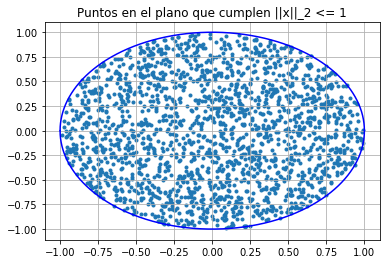

In [82]:
f=lambda x: np.sqrt(x[:,0]**2 + x[:,1]**2) #definición de norma2
density=1e-5
density_p=int(2.5*10**3)
x=np.arange(-1,1,density)
y1=np.sqrt(1-x**2)
y2=-np.sqrt(1-x**2)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x,y1,'b',x,y2,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_2 <= 1')
plt.grid()
plt.show()

Norma $1$:  $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_1 \leq 1\}$

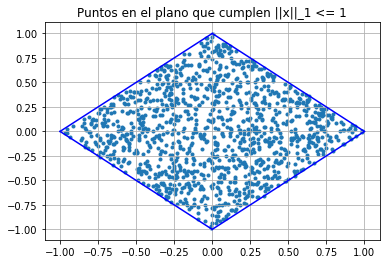

In [83]:
f=lambda x:np.abs(x[:,0]) + np.abs(x[:,1]) #definición de norma1
density=1e-5
density_p=int(2.5*10**3)
x1=np.arange(0,1,density)
x2=np.arange(-1,0,density)
y1=1-x1
y2=1+x2
y3=x1-1
y4=-1-x2
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x1,y1,'b',x2,y2,'b',x1,y3,'b',x2,y4,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_1 <= 1')
plt.grid()
plt.show()

Norma $\infty$:  $\{ x \in \mathbb{R}^2  \text{ tales que } ||x||_\infty \leq 1\}$

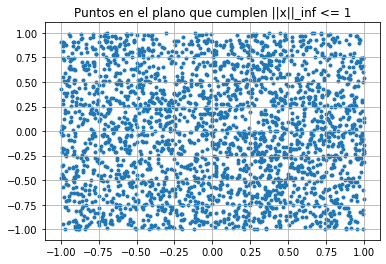

In [84]:
f=lambda x:np.max(np.abs(x),axis=1) #definición de norma infinito
density_p=int(2.5*10**3)
x_p=np.random.uniform(-1,1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_inf <= 1')
plt.grid()
plt.show()

->La norma $\infty$ se encuentra en esta familia como límite: 

$$||x||_\infty = \displaystyle \lim_{p \rightarrow \infty} ||x||_p.$$

->En la norma $\mathcal{l}_2$ o Euclidiana $||x||_2$ tenemos una desigualdad muy importante, la desigualdad de **Cauchy-Schwartz**:

$$|x^Ty| \leq ||x||_2||y||_2 \forall x,y \in \mathbb{R}^n$$

la cual relaciona el producto interno estándar para $x,y \in \mathbb{R}^n$: $<x,y> = x^Ty = \displaystyle \sum_{i=1}^nx_iy_i$ con la norma $\mathcal{l}_2$ de $x$ y la norma $\mathcal{l}_2$ de $y$. Además se utiliza lo anterior para definir el ángulo (sin signo) entre $x,y$: 

$$\measuredangle x,y = \cos ^{-1}\left(\frac{x^Ty}{||x||_2||y||_2} \right )$$

para $\cos^{-1}(u) \in [0,\pi]$ y se nombra a $x,y$ ortogonales si $x^Ty=0$. Obsérvese que $||x||_2 = \sqrt{x^Tx}$.

* También se utilizan matrices* para definir normas

*Matriz: arreglo $2$-dimensional de datos o $2$ arreglo de orden $2$. Se utiliza la notación $A \in \mathbb{R}^{m\times n}$ para denotar:


$$A = \left[\begin{array}{cccc}
a_{11} &a_{12}&\dots&a_{1n}\\
a_{21} &a_{22}&\dots&a_{2n}\\
\vdots &\vdots& \vdots&\vdots\\
a_{n1} &a_{n2}&\dots&a_{nn}\\
\vdots &\vdots& \vdots&\vdots\\
a_{m-11} &a_{m-12}&\dots&a_{m-1n}\\
a_{m1} &a_{m2}&\dots&a_{mm}
\end{array}
\right] 
$$


*$a_{ij} \mathbb{R} \forall i=1,\dots,m, j=1,\dots,n$.

*$A=(a_1,\dots a_n), a_j \in \mathbb{R}^m (=\mathbb{R}^{m\times1}) \forall j=1,\dots,n$.

*$A=\left ( \begin{array}{c}
a_1^T\\
\vdots\\
a_m^T
\end{array} \right ), a_i \in \mathbb{R}^n (=\mathbb{R}^{n\times1}) \forall i=1,\dots,m$.

Entonces un ejemplo de norma-$2$ ponderada es: $\{x \in \mathbb{R}^2 \text{ tales que } ||x||_D \leq 1, ||x||_D = ||Dx||_2, \text{con matriz diagonal } D\}$:  

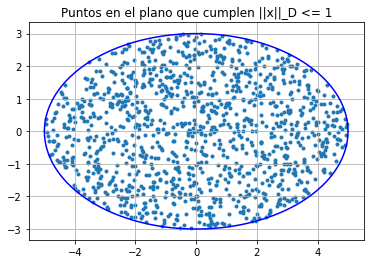

In [85]:
d1=1/5
d2=1/3
f=lambda x: np.sqrt((d1*x[:,0])**2 + (d2*x[:,1])**2) #definición de norma2
density=1e-5
density_p=int(2.5*10**3)
x=np.arange(-1/d1,1/d1,density)
y1=1.0/d2*np.sqrt(1-(d1*x)**2)
y2=-1.0/d2*np.sqrt(1-(d1*x)**2)
x_p=np.random.uniform(-1/d1,1/d1,(density_p,2))
ind=f(x_p)<=1
x_p_subset=x_p[ind]
plt.plot(x,y1,'b',x,y2,'b')
plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_D <= 1')
plt.grid()
plt.show()

en este caso $D=\left[\begin{array}{cc}
\frac{1}{5} &0\\
0 &\frac{1}{3}
\end{array}\right ]$

## Normas matriciales

La multiplicación de una matriz de tamaño $m\times n$ por un vector se define como:

$$y=Ax=\displaystyle \sum_{j=1}^n \alpha_jx_j$$

con $a_j \in \mathbb{R}^m, x \in \mathbb{R}^n$. Obsérvese que $x \in \mathbb{R}^n, Ax \in \mathbb{R}^m$.

**Inducidas**

De las normas matriciales más importantes se encuentran las **inducidas** por normas vectoriales. Estas normas matriciales se definen en términos de los vectores en $\mathbb{R}^n$ a los que se les aplica la multiplicación $Ax$:

Dadas las normas vectoriales $||\cdot||_{(n)}, ||\cdot||_{(m)}$ en $\mathbb{R}^n$ y $\mathbb{R}^m$ respectivamente, la norma matricial inducida $||A||_{(m,n)}$ para $A \in \mathbb{R}^{m \times n}$ es el **menor número** $C$ para el cual la desigualdad: 

$$||Ax||_{(m)} \leq C||x||_{(n)}$$

se cumple $\forall x \in \mathbb{R}^n$. Esto es:

$$||A||_{(m,n)} = \displaystyle \sup_{x \in \mathbb{R}^n} \frac{||Ax||_{(m)}}{||x||_{(n)}}$$

**Comentarios:** 

* $||A||_{(m,n)}$ representa el **máximo** factor por el cual $A$ puede modificar el tamaño de $x$ sobre todos los vectores $x \in \mathbb{R}^n$, es una medida de un tipo de **worst case stretch factor**.

* Así definidas, la norma $||\cdot||_{(m,n)}$ es la norma matricial inducida por las normas vectoriales $||\cdot||_{(m)}, ||\cdot||_{(n)}$.

* Son definiciones equivalentes:

$$||A||_{(m,n)} = \displaystyle \sup_{x \in \mathbb{R}^n} \frac{||Ax||_{(m)}}{||x||_{(n)}} = \displaystyle \sup_{||x||_{(n)} \leq 1} \frac{||Ax||_{(m)}}{||x||_{(n)}} = \displaystyle \sup_{||x||_{(n)}=1} ||Ax||_{(m)}$$

**Ejemplo:**

La matriz $A=\left[\begin{array}{cc}
1 &2\\
0 &2
\end{array}\right ]$ mapea $\mathbb{R}^2$ a $\mathbb{R}^2$, en particular se tiene:

* $A$ mapea $e_1 = \left[\begin{array}{c}
1 \\
0
\end{array}\right ]$ a la columna $a_1 = \left[\begin{array}{c}
1 \\
0
\end{array}\right ]$ de $A$.

* $A$ mapea $e_2 = \left[\begin{array}{c}
0 \\
1
\end{array}\right ]$ a la columna $a_2 = \left[\begin{array}{c}
2 \\
2
\end{array}\right ]$ de $A$.

Considerando $||A||_p := ||A||_{(p,p)}$ con $p=1, p=2, p=\infty$ se tiene:

<img src="https://dl.dropboxusercontent.com/s/3fqz9uspfwdurjf/normas_matriciales.png?dl=0" heigth="500" width="500">



**Comentario:** al observar la segunda gráfica se tiene la siguiente afirmación: la acción de una matriz sobre una circunferencia es una elipse con longitudes de semiejes iguales a $|d_i|$. En general la acción de una matriz sobre una hiper esfera es una hiperelipse. Por lo que los vectores unitarios en $\mathbb{R}^n$ que son más amplificados por la acción de una matriz diagonal $D \in \mathbb{R}^{m\times n}$ con entradas iguales a $d_i$ son aquellos que se mapean a los semiejes de una hiperelipse en $\mathbb{R}^m$ de longitud  igual a $\max\{|d_i|\}$ y así tenemos: si $D$ es una matriz diagonal con entradas $|d_i|$ entonces $||D||_2 = \displaystyle \max_{i=1,\dots,m}\{|d_i|\}$. 

**Ejemplo con Python para la norma $1$:**

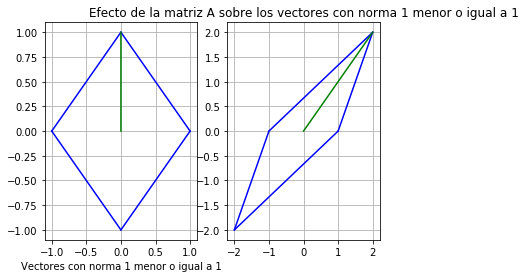

In [86]:
A=np.array([[1,2],[0,2]])
density=1e-5
x1=np.arange(0,1,density)
x2=np.arange(-1,0,density)
x1_y1 = np.column_stack((x1,1-x1))
x2_y2 = np.column_stack((x2,1+x2))
x1_y3 = np.column_stack((x1,x1-1))
x2_y4 = np.column_stack((x2,-1-x2))
apply_A = lambda vec : np.transpose(A@np.transpose(vec))
A_to_vector_1 = apply_A(x1_y1)
A_to_vector_2 = apply_A(x2_y2)
A_to_vector_3 = apply_A(x1_y3)
A_to_vector_4 = apply_A(x2_y4)
plt.subplot(1,2,1)
plt.plot(x1_y1[:,0],x1_y1[:,1],'b',
         x2_y2[:,0],x2_y2[:,1],'b',
         x1_y3[:,0],x1_y3[:,1],'b',
         x2_y4[:,0],x2_y4[:,1],'b')
e1 = np.column_stack((np.repeat(0,len(x1)),x1))
plt.plot(e1[:,0],e1[:,1],'g')
plt.xlabel('Vectores con norma 1 menor o igual a 1')
plt.grid()
plt.subplot(1,2,2)
plt.plot(A_to_vector_1[:,0],A_to_vector_1[:,1],'b',
         A_to_vector_2[:,0],A_to_vector_2[:,1],'b',
         A_to_vector_3[:,0],A_to_vector_3[:,1],'b',
         A_to_vector_4[:,0],A_to_vector_4[:,1],'b')
A_to_vector_e1 = apply_A(e1)
plt.plot(A_to_vector_e1[:,0],A_to_vector_e1[:,1],'g')
plt.grid()
plt.title('Efecto de la matriz A sobre los vectores con norma 1 menor o igual a 1')
plt.show()

In [87]:
np.linalg.norm(A,1)

4.0

**Ejercicio:** obtener las otras dos gráficas con Python usando norma $2$ y norma $\infty$.

**Resultados computacionales que es posible probar:**

1. $||A||_1 = \displaystyle \max_{j=1,\dots,n}\sum_{i=1}^n|a_{ij}|$.

2. $||A||_\infty = \displaystyle \max_{i=1,\dots,n}\sum_{j=1}^n|a_{ij}|$.

3. $||A||_2 = \sqrt{\lambda_{max}(A^TA)} = \max \left \{\sqrt{\lambda}\in \mathbb{R} | \lambda \text{ es eigenvalor de } A^TA \right \} = max \left \{ \sigma \in \mathbb{R} | \sigma \text{ es valor singular de A } \right \} = \sigma_{max}(A)$.

por ejemplo para la matriz anterior se tiene:

In [88]:
np.linalg.norm(A,2)

2.9208096264818897

In [89]:
_,s,_ = np.linalg.svd(A)
np.max(s)

2.9208096264818897

**Otras normas matriciales:**

* Norma de Frobenius: $||A||_F = \text{tr}(A^TA)^{1/2} = \left ( \displaystyle \sum_{i=1}^m \sum_{j=1}^n a_{ij}^2 \right ) ^{1/2}$.

* Norma "sum-absolute-value": $||A||_{sav} = \displaystyle \sum_{i=1}^m \sum_{j=1}^n |a_{ij}|$.

* Norma "max-absolute-value": $||A||_{mav} = \displaystyle \max \left\{|a_{ij}| \text{ para } i=1,\dots,m , j=1,\dots,n \right \}$.

**Comentarios:** 

* El producto interno estándar en $\mathbb{R}^{m\times n}$ es: $<A,B> = tr(A^TB) = \displaystyle \sum_{i=1}^m \sum_{j=1}^n a_{ij}b_{ij}$.

* La norma $2$ (también llamada norma espectral o $\mathcal{l}_2$) y la norma de Frobenius cumplen la propiedad de **consistencia**:

$$||Ax|| \leq ||A|| ||x|| \forall x \in \mathbb{R}^n, \forall A \in \mathbb{R}^{m\times n}.$$

$$||AB|| \leq ||A|| ||B|| \forall A,B \text{ matrices con dimensiones correspondientes para su multiplicación}.$$

**Obs:** de hecho esta propiedad de consistencia también es cumplida por las normas-$p$ matriciales.

## Nota sobre $\sup$

Si $C \subseteq \mathbb{R}$ entonces $a \subseteq \mathbb{R}$ es una **cota superior** en $C$ si

$$ x \leq a, \forall x \in C.$$

En $\mathbb{R}$ el conjunto de cotas superiores es $\emptyset, \mathbb{R}$ ó un intervalo de la forma $[b,\infty]$. En el último caso, $b$ se llama **mínima cota superior o supremo del conjunto** $C$ y se denota $\sup C$. Por convención $\sup\emptyset = -\infty$ y $\sup C=\infty$ si $C$ no es acotado por arriba.

**Obs:** si $C$ es finito, $\sup C$ es el máximo de los elementos de $C$ y típicamente se denota como $\max C$.

Análogamente, $a \in \mathbb{R}$ es una **cota inferior** en $C \subseteq \mathbb{R}$ si 
$$a \leq x, \forall x \in C.$$

El **ínfimo o máxima cota inferior** de $C$ es $\inf C = -\sup (-C)$. Por convención $\inf \emptyset = \infty$ y si $C$ no es acotado por debajo entonces $\inf C = -\infty$.

**Obs:** si $C$ es finito, $\inf C$ es el mínimo de sus elementos y se denota como $\min C$.

**Ejercicios**

1. Resuelve los ejercicios y preguntas de la nota.

**Preguntas de comprehensión**

1)¿Qué factores influyen en la falta de exactitud de un cálculo?

2)Menciona $5$ propiedades que un conjunto debe cumplir para que sea considerado un espacio vectorial.

3)Menciona las propiedades que debe cumplir una función para que se considere una norma.

4)¿Qué es una norma matricial inducida?, ¿qué mide una norma matricial inducida?

5)¿La norma de Frobenius, es una norma matricial inducida?

6)¿A qué son iguales $\text{sup}(\emptyset)$, $\text{inf}(\emptyset)$ ? (el conjunto $\emptyset$ es el conjunto vacío)

7)Si f es un problema mal condicionado, ¿a qué nos referimos? Da ejemplos de problemas bien y mal condicionados.

8)Si f es un problema que resolvemos con un algoritmo g, ¿qué significa:

    a. que g sea estable?
    
    b. que g sea estable hacia atrás?
    
    c. que g sea inestable?
    
9)¿Qué ventaja(s) se tiene(n) al calcular un error hacia atrás vs calcular un error hacia delante?



**Referencias**

1. Nota [1.2.Sistema_de_punto_flotante](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.2.Sistema_de_punto_flotante.ipynb)

2. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

3. G. H. Golub, C. F. Van Loan,Matrix Computations. John Hopkins University Press, 2013